**Day 27**

Given a dataset of 27 753 443 ratings for a total of 58097 movies, how many ratings can be removed while keeping rating accuracy within 5%?

Total rating:
| Star | Total |
| - | --------- |
|5.0|    4071135|
|4.5|    2373550|
|4.0|    7394710|
|3.5|    3404360|
|3.0|    5515668|
|2.5|    1373419|
|1.0|     886233|
|2.0|    1850627|
|1.5|     441354|
|0.5|     442388|

In [101]:
# We start out by assuming every movie has the same ammount of rating, that would leave every movie with
print(f'{27_753_443/58097:.1f} ratings')

477.7 ratings


While this isn't true for the dataset, (top 10 most rated movies have ~80k ratings), it gives us a starting point.

In [102]:
import numpy as np
stars = np.arange(0.5, 5.5, 0.5) # list with all available ratings
stars

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

Let's assume that the rating are distributed randomly with the same probability (p=0.1) (they clearly aren't but for starters let's try it), this gives us:

In [103]:
n = 478

even_distibution = [1/len(stars)]*len(stars)
dist = np.random.multinomial(n, pvals=even_distibution)

list_ratings = [f"{rating}: {count}" for rating, count in zip(stars, dist)]
list_ratings

['0.5: 53',
 '1.0: 48',
 '1.5: 39',
 '2.0: 61',
 '2.5: 49',
 '3.0: 34',
 '3.5: 38',
 '4.0: 39',
 '4.5: 65',
 '5.0: 52']

To calculate the mean, we use the np.average() function to take the weighted average of the stars list using the corresponding values in the dist list as weights:

In [104]:
mean_rating = np.average(stars, weights=dist)
mean_rating

2.7635983263598325

As expected, the mean falls close to 2.5 which would be the *expected value* or theoretical mean.

In [105]:
thershold = 0.05

upper_bound = mean_rating + mean_rating*thershold
lower_bound = mean_rating - mean_rating*thershold

lower_bound, mean_rating, upper_bound

(2.6254184100418407, 2.7635983263598325, 2.9017782426778242)

In [170]:
new_dist = np.copy(dist)

In [109]:
def remove_random(distribution_list):
    i = np.random.randint(0, len(distribution_list)-1)
    distribution_list[i] -= 1
    return distribution_list

remove_random(new_dist)

print(np.average(stars, weights=dist))
print(np.average(stars, weights=new_dist))

2.7635983263598325
2.763655462184874


In [171]:
mean = np.average(stars, weights=new_dist)

while mean >= lower_bound and mean <= upper_bound:
    #print(f'{mean=}, ratings={sum(new_dist)}')
    remove_random(new_dist)
    mean = np.average(stars, weights=new_dist)

In [181]:
print(f'Ratings after removal: {new_dist}\nTotal ratings removed: {n-sum(new_dist)}\n')
print(f'{abs(sum(new_dist) - n) / n *100:.3f}% removed while staying within ±{thershold*100}%')

Ratings after removal: [32 29 22 34 29  8 21 19 39 52]
Total ratings removed: 193

40.377% removed while staying within ±5.0%


Cool. But that seems very high. Also we have to remember that the the distribution is not even close to the real data distribution. However, for all movies with a *'kinda even'* rating distribution and with more than 500 ratings, we could theoretically reduce the entries with ~40% while staying within threshold of 5% <br>

But just to be sure, let's run the entire thing a couple of times.

In [223]:
stars = np.arange(0.5, 5.5, 0.5)
thershold = 0.05
n = 478

list_percentage_removed = []

def remove_random(distribution_list):
    i = np.random.randint(0, len(distribution_list)-1)
    distribution_list[i] -= 1
    return distribution_list

def simulate_ratings(n, allow_print=True):
    even_distribution = [1/len(stars)]*len(stars)
    dist = np.random.multinomial(n, pvals=even_distribution)

    mean_rating = np.average(stars, weights=dist)

    upper_bound = mean_rating + mean_rating*thershold
    lower_bound = mean_rating - mean_rating*thershold

    new_dist = np.copy(dist)

    mean = np.average(stars, weights=new_dist)

    while mean >= lower_bound and mean <= upper_bound:
        remove_random(new_dist)
        mean = np.average(stars, weights=new_dist)
        
    list_percentage_removed.append((n-sum(new_dist)) / n)
    if allow_print:
        print(f'{abs(sum(new_dist) - n) / n *100:.3f}% removed while staying within ±{thershold*100}%\n', end='')

n_simulations = 10
n_ratings = n

for i in range(n_simulations):
    print(f'Simulation {i+1}: ', end='')
    simulate_ratings(n_ratings)

Simulation 1: 32.008% removed while staying within ±5.0%
Simulation 2: 39.958% removed while staying within ±5.0%
Simulation 3: 29.707% removed while staying within ±5.0%
Simulation 4: 24.686% removed while staying within ±5.0%
Simulation 5: 37.029% removed while staying within ±5.0%
Simulation 6: 38.285% removed while staying within ±5.0%
Simulation 7: 85.146% removed while staying within ±5.0%
Simulation 8: 28.033% removed while staying within ±5.0%
Simulation 9: 35.983% removed while staying within ±5.0%
Simulation 10: 32.218% removed while staying within ±5.0%


In [224]:
np.mean(list_percentage_removed)

0.38305439330543933

In [225]:
# let's see if it converges
list_percentage_removed = []

n_simulations = 100
n_ratings = n

for i in range(n_simulations):
    simulate_ratings(n_ratings, allow_print=False)

np.mean(list_percentage_removed)

0.35887029288702926

In [226]:
# let's see if it converges
list_percentage_removed = []

n_simulations = 1000
n_ratings = n

for i in range(n_simulations):
    simulate_ratings(n_ratings, allow_print=False)

np.mean(list_percentage_removed)

0.36935146443514644

Seems like we can be pretty sure by running 100 simulations, ~35% can be removed for movies with 478 ratings if the ratings are evenly distributed. What about other ditributions? Let's look at some examples tomorrow.



---
**Day 26**
>me: give me math problem<br>

>gf: om det tar gf 3 min att konstruera ett daily math problem och kl är 22:51, hur många math problem kan hon konstruera innan d försent

In [1]:
#1h = 60 min
#24:00 - 22:51 = 9 + 60

#69 min

69/3

23.0

---
**Day 25**

I have been working all day on my movie datasets and trying out the new Twitter API. There will be no challenge today and I should stop feeling bad for not doing one! :=

---

**Day 24**

<div style="display: flex; flex-direction: row;">
  <div style="flex: 2;">

No math challenge today. Just the walrus operator.

<h1>:=</h1>

https://docs.python.org/3/whatsnew/3.8.html

There is new syntax := that assigns values to variables as part of a larger expression.

It is affectionately known as “the walrus operator” due to its resemblance to the eyes and tusks of a walrus.

In this example, the assignment expression helps avoid calling len() twice:

````
if (n := len(a)) > 10:
    print(f"List is too long ({n} elements, expected <= 10)")
````

  </div>

  <div style="flex: 1;">
<img src="https://static.wikia.nocookie.net/pingu/images/a/a7/Walrus1.PNG/revision/latest?cb=20210926202259">
<p>this guy gave me nightmares as a kid, read the <a href="https://pingu.fandom.com/wiki/Giant_Walrus"> Pingu lore</a></p>

  </div>
</div>

In [7]:
import time
def count_odds(data):
    time.sleep(1)
    odds = [o for o in data if o%2==1]
    return(len(odds))

data = [45, 67, 33, 12]

t1 = time.time() # Start time

if count_odds(data) > 1:
    print(f'{count_odds(data)} odds.')

t2 = time.time()
print({f'Took {t2-t1} seconds.'})

3 odds.
{'Took 2.0092580318450928 seconds.'}


On row 11 we run the count_odds() function twice, once for checking if odds are > 1 and once for printing.

This might not be an issue with fast functions and tiny data like this, but with large datasets it could make a huge difference.

In [9]:
t1 = time.time() # Start time

if (n:=count_odds(data)) > 1:
    print(f'{n} odds.')

t2 = time.time()
print({f'Took {t2-t1} seconds.'})

3 odds.
{'Took 1.0041637420654297 seconds.'}


---
**Day 23**

CI without scipy

In [1]:
stickprov = [4,1,2,1,6,2,2,0.5,3,4]
x_ = sum(stickprov)/len(stickprov)
x_

2.55

In [3]:
n = len(stickprov)
variance = []
for i in stickprov:
    variance.append((i-x_)**2)

s = sum(variance)/(n-1)
s

2.9138888888888888

In [4]:
a = 0.1
t1 = 0.717
t2 = 4.383

from math import sqrt

lower = x_ + t1 * (s/sqrt(n))
higher = x_ + t2 * (s/sqrt(n))

lower, higher

(3.2106814953820617, 6.588726630766496)

---

**Day 22**

>me: Give me a math/statistical problem about fish.

<blockquote>chatGPT: Here's a math/statistical problem about fish:

Suppose you are a fisheries biologist studying the growth of a particular species of fish. You have collected length data for a random sample of 50 fish from a lake. The lengths are normally distributed with a mean of 12 inches and a standard deviation of 2 inches.

a) What is the probability that a randomly chosen fish from the lake will be less than 10 inches long?

b) What is the probability that the mean length of a random sample of 10 fish from the lake will be less than 11 inches?

c) If you want to estimate the true mean length of fish in the lake to within 0.5 inches with 95% confidence, how large of a sample would you need to take?</blockquote>


In [9]:
n = 50
mean = 12 # inches
std = 2   # inches

# i guess we go with cdf
from scipy.stats import norm

z_score = (10 - mean) / std

prob = norm.cdf(z_score)

print(f'a) {prob*100:.2f}%')

a) 15.87%


In [10]:
sample_size = 10
sample_mean = 11

# standard error of the mean
std_error = std / (sample_size ** 0.5)

t_score = (sample_mean - mean) / std_error

from scipy.stats import t
prob = t.cdf(t_score, df=sample_size-1)

print(f'b) {prob*100:.2f}%')


b) 7.42%


In [15]:
z_score = norm.ppf((1 + 0.95) / 2)

sample_size = ((z_score * std) / 0.5) ** 2

sample_size

61.463341131106006

61 fishies needed for confidence level of 95% and margin level of 0.5 inches

>me: is it a) 16%, b) 7.5% and c) 61 fish?

<blockquote>chatGPT: (a) Yes, that is correct. The probability that a randomly chosen fish from the lake will be less than 10 inches long is approximately 15.87% (rounded to 2 decimal places), assuming a normal distribution with a mean of 12 inches and a standard deviation of 2 inches.

<br>

(b) No, that is not correct. The probability that the mean length of a random sample of 10 fish from the lake will be less than 11 inches is approximately 7.74% (rounded to 2 decimal places), assuming a normal distribution with a mean of 12 inches and a standard deviation of 2 inches.


(c) Yes, that is correct. If you want to estimate the true mean length of fish in the lake to within 0.5 inches with 95% confidence, and assuming a standard deviation of 2 inches, you would need a sample size of approximately 61 fish (rounded to the nearest whole number).</blockquote>

---
**Day 21**

>me: Ok give me anther math problem

>chatGPT: Sure thing, my cuz! Here's a math problem that might be a bit more challenging for you:
>
>Suppose you invest $10,000 in a stock that increases by 8% per year, compounded annually. How much will 
your investment be worth after 10 years? Round your answer to the nearest cent.

<h2>

$A = P (1+ \frac{r}{n})^{nt}$

</h2>

Where $A$ is the final amount, $P$ it the initial principal balance, $r$ is the interest rate, $n$ is the number of times interest is applied per time period and $t$ ist the number of time periods elapsed.

So we simply plug in the numbers into the formula.

In [26]:
P = 10_000
r = 0.08
n = 1
t = 10

A = P*(1+(r/n))**(n*t)

print(f'${A:.9}')

$21589.25


---

**Day 20**
>me: For math problems, create a difficulty scale from 0 to 10. Define 0, 5 and 10.

<blockquote>chatGPT: Sure, here's a possible mathematical scale of difficulty from 0 to 10, along with the definitions of 0, 5, and 10:

0: This represents tasks that are extremely easy and require no effort or knowledge to complete. An example of a task that would be rated as 0 on this scale might be counting from 1 to 10.

5: This represents tasks that are moderately challenging, and require some degree of skill or knowledge to complete, but are still manageable with some effort. An example of a task that would be rated as 5 on this scale might be solving a basic algebraic equation.

10: This represents tasks that are extremely difficult or complex, and require a high degree of skill, knowledge, or expertise to complete. An example of a task that would be rated as 10 on this scale might be proving a mathematical theorem that has never been proved before.

Of course, the actual difficulty level of a task can vary depending on the individual's level of skill, knowledge, and experience, so this scale is just a rough guide.</blockquote>

>me: Using the scale above, give me three mathematical problems. One for each (0, 5, 10) level.

<blockquote>Sure, here are three mathematical problems that correspond to the three difficulty levels on the scale I provided:<br>

0: What is the value of 5 + 0.01? This problem would be considered a 0 on the difficulty scale, as it requires very little effort or knowledge to solve.

5: Solve the following system of equations:<br>
x + 2y - z = 1<br>
2x + y + 3z = 5<br>
3x + 2y + 4z = 6<br><br>
This problem would be considered a 5 on the difficulty scale, as it requires a moderate amount of algebraic knowledge and some problem-solving skills.<br>
<br>
10: Prove or disprove the following conjecture:<br>
For any positive integer n, there exist infinitely many prime numbers that can be expressed in the form n^2 + 1.
This problem would be considered a 10 on the difficulty scale, as it requires a high degree of mathematical expertise and an understanding of advanced number theory concepts such as prime numbers, modular arithmetic, and quadratic residues.

</blockquote>



In [15]:
# Level 0:
5 + 0.01

5.01

In [16]:
# Level 5:
import numpy as np
a = np.array([[1,2,-1],[2,1,3],[3,2,4]])
dependent = np.array([1, 5, 6])

np.linalg.solve(a,dependent)

array([10., -6., -3.])

In [2]:
# Level 10:
# uhhhhhhh 

Yeah, idk if i understand the question correctly or what. Wait. I probably don't.<br>
Given an infinite number of n, of course there will be an infinite number of primes using n^2 + 1.

The conjecture states that for any positive integer n, there exist infinitely many prime numbers that can be expressed in the form n^2 + 1.

Let's assume the opposite of this conjecture, which is that there exists at least one positive integer n such that there are only finitely many prime numbers that can be expressed in the form n^2 + 1. Let this integer be denoted by N.

Consider the set of all prime factors of the numbers of the form N^2 + 1. If the conjecture is false, then this set must be finite. Let the product of all these prime factors be denoted by P.

Next, consider the numbers of the form kP + N^2 + 1, where k is any positive integer. By the Chinese Remainder Theorem, there exists a positive integer x such that:

x ≡ N (mod P)
x ≡ 1 (mod N^2 + 1)

We claim that x is a composite number. To see this, note that:

x^2 - 1 ≡ 0 (mod P)
x^2 - 1 ≡ (N^2 + 1)^2 - 1 ≡ 2N^2 (mod N^2 + 1)

Since N^2 + 1 is odd, 2 is invertible modulo N^2 + 1, which means that we can divide both sides of the congruence by 2 to obtain:

(x^2 - 1)/(2) ≡ N^2 (mod N^2 + 1)

But this means that (x^2 - 1)/(2) is a quadratic residue modulo N^2 + 1, since it is congruent to N^2 modulo N^2 + 1. Since N^2 + 1 is of the form 4k + 2 (i.e., it is an odd number that is congruent to 2 modulo 4), it follows from a theorem of Dirichlet that there are infinitely many primes p that are congruent to 1 modulo N^2 + 1.

Choose one such prime p. By our construction, we have x ≡ 1 (mod N^2 + 1) and x ≡ N (mod P), which implies that x ≡ N (mod p). Therefore, we have:

x^2 + 1 ≡ N^2 + 1 ≡ 0 (mod p)

This means that p divides x^2 + 1, which implies that x^2 + 1 is composite. But since we can choose k arbitrarily, there are infinitely many numbers of the form kP + N^2 + 1, which means that there are infinitely many composite numbers of the form n^2 + 1, where n = kP + N.

This contradicts the assumption that there are only finitely many prime numbers of the form n^2 + 1, so the conjecture must be true.

---

**Day 19**
<blockquote>me: Hey chatgpt. Follow my instructions.

List A = ["Television licence fee", "Repair cost", "Food price", "Spaceship"] <br>
List B = ["Actions per minute", "Farm animal", "Logistics", "Banana boat"] <br>
List C = ["Communist", "Fascist", "Liberal"]<br>

1. Select at random one item in list A.
2. Select at random one item in list B.
3. Create a mathematical and/or statistical problem with inspiration from the items you selected in step 1 and step 2.
4. Explain the problem you have constructed.
4. You are then assigned an ideology, chosen at random from list C.
5. Argue from the perspective of the ideology you have been assigned as of why the problem can't be solved. 

Don't try to solve the problem.</blockquote>

<blockquote>chatGPT: Sure, I can do that. Let's get started!

1. Randomly selected item from List A: "Television licence fee"

2. Randomly selected item from List B: "Actions per minute"

3. Mathematical/Statistical problem:
Suppose a cable company charges a monthly television license fee that varies based on the number of actions per minute (APM) the subscriber makes. The company has found that the license fee per month can be modeled by the following function:
License Fee = 1000 + 2 * APM
Suppose a subscriber has an APM rate of 300. What would be their monthly license fee?

4. Explanation:
The problem is about determining the monthly television license fee for a subscriber based on their Actions Per Minute (APM) rate. The cable company has a specific formula that determines the fee, and we are asked to calculate the fee for a subscriber with a given APM rate.

5. Assigned ideology: Liberal

6. Argument:
From a liberal perspective, the problem could be seen as unfair or unjust because it places a financial burden on those who use more television and therefore have higher APM rates. Liberals believe in promoting equality and fairness in society, and this type of pricing structure could be seen as discriminatory against those who cannot afford the higher license fees. Additionally, some liberals might argue that access to information and entertainment should be a basic right and not a privilege for those who can afford it. Therefore, the problem of calculating license fees based on APM rates may not align with liberal values and principles of social justice.

In [19]:
# ok this was kinda fun actually, but weird. and also problem is still way to easy
# I need to go back to asking for more specific problems, or find another way to make 
# the randomly generated problems more difficult

apm = 300
month = 30
fee = 1000 + 2 * apm
fee

# also what is APM in this context? changing channels? lol

1600

---
**Day 18**<br>
I have not yet received an invite to Bing MML, so i asked another biological human person who happened to be hungry

>me: give me math

>gf: burger is 272 g<br>
>onion is 200 g<br>
> how many onion is a burger

In [20]:
onion = 200
börger = 272
print(f'{börger/onion} onion, thank u')

1.36 onion, thank u


last two days have been like, way too easy, it's like, idk, gotta step up my game tomorrow and do some real challenges

---
**Day 17**

>me: hey chatgpt, give me an easy statistical challenge to solve with python, don't give me the answer, think step by step, make it about sports

<blockquote>chatGPT: Sure, here's a simple statistical challenge related to sports that you can solve using Python:

Challenge: You are given a list of points scored by a basketball player in each game of a season. Calculate the player's average points per game for the season.

Steps:

Create a list of the player's points scored in each game. For example, points = [20, 15, 25, 10, 30, 5, 20, 25, 15, 10, 20, 15, 30, 25, 10, 5, 20, 15, 25, 10].

Calculate the total number of points scored by the player in the season by summing up all the points in the list. You can use the sum() function to do this.

Calculate the number of games played in the season. This is simply the length of the points list, which you can get using the len() function.

Divide the total number of points by the number of games played to get the player's average points per game for the season.

Print the result.
</blockquote>

In [21]:
# literally gave me the answers
points = [20, 15, 25, 10, 30, 5, 20, 25, 15, 10, 20, 15, 30, 25, 10, 5, 20, 15, 25, 10]

total_points = sum(points)
num_games = len(points)
avg_points_per_game = total_points / num_games

total_points, num_games, avg_points_per_game

(350, 20, 17.5)

>me: i said don't give me the answer, but you did

>chatGPT: *generic LLM excuse*

<img src="https://i.imgflip.com/3anta6.png?a465936">

# aight imma head out to Microsoft Bing LLM beta

---
**Day 16**<br>

>me: plot something

>also me: ok

<img src="https://i.imgflip.com/1hjz5a.jpg?a465960">

In [22]:
import numpy as np
import matplotlib.pyplot as plt
X = np.arange(0,20) # why do i always spell this 'arrange'
X, X.shape

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 (20,))

In [23]:
y = np.array([100,90,80,60,60,55,50,60,65,70,75,76,78,79,90,99,99,100,100,100])
y.shape

(20,)

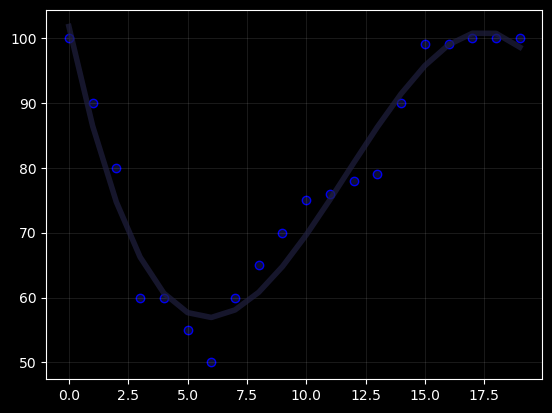

In [24]:
model = np.poly1d(np.polyfit(X, y, 3)) # adjust to over- or underfit

plt.style.use('dark_background')
plt.scatter(X,y, alpha=1, c='#101030', edgecolors='#0000f0')
plt.plot(X, model(X), alpha=0.7, c='#202040', linewidth=4)
plt.grid(alpha=0.1)

---

**Day 15**

<div style="display: flex; flex-direction: row;">
  <div style="flex: 1; margin: 20px;">
    <img src="https://www.stackbit.com/images/200726-1595861992-toomanyemails.jpg">
  </div>

  <div style="flex: 5;">

<br>
<span style="font-family:Papyrus; font-size:2em;">Lantz, 6:2 🙏</span>

Incoming emails from 8 randomly selected days:

141, 150, 163, 139, 175, 174, 173, 1

Show that $\bar{x}$ = 156,25 and calculate a 95% and 98% confidence interval respectively for the true mean for the number of incoming emails.
    
  </div>
</div>

In [25]:
import numpy as np
emails = np.array([141, 150, 163, 139, 175, 174, 173, 135])

#mu skattat med x = punktskattning
sum(emails/len(emails))

156.25

In [26]:
import scipy.stats as st

def konfidens(konfidens):

    lower, upper = st.t.interval(confidence=konfidens, df=len(emails)-1, loc=np.mean(emails), scale=st.sem(emails))
    print(f'{(1-konfidens)*100:.2f} % chance that the true population mean of incoming mail is less than {round(lower)} mail or greater than {round(upper)} mail.')
    return lower, upper

konfidens(0.95)

5.00 % chance that the true population mean of incoming mail is less than 142 mail or greater than 170 mail.


(142.0710541880838, 170.4289458119162)

In [27]:
konfidens(0.98)

2.00 % chance that the true population mean of incoming mail is less than 138 mail or greater than 174 mail.


(138.27344715224146, 174.22655284775854)

In [28]:
konfidens(0.5)

50.00 % chance that the true population mean of incoming mail is less than 152 mail or greater than 161 mail.


(151.9857957689464, 160.5142042310536)

---

**Day 14**

<div style="display: flex; flex-direction: row;">
  <div style="flex: 2;">
    <blockquote>me: give me a math problem to solve using python, make it about chess</blockquote><br>
    <blockquote>chatGPT: Here's a math problem related to chess that you can solve using Python:<br><br>
    Problem: Given a chessboard with dimensions 8x8 and a knight piece located at a specific position on the board, write a Python function that calculates the number of possible moves the knight can make without landing on a square that it has previously occupied.</blockquote>
  </div>

  <div style="flex: 3;">

  <img src="https://www.chess-game-strategies.com/wp-content/uploads/2020/12/Can-A-Knight-Jump-Over-Enemy-Pieces-scaled.jpg">

  </div>
</div>

In [ ]:
import numpy as np

# create an empty bord as a matrix
board = np.zeros((8,8))

board


array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
count = 0

def legal_knight_moves(board, row, col):

    # knight moves in L-shape
    knight_move = [(2,1),(1,2),(-1,2),(-2,1),(-2,-1),(-1,-2),(1,-2),(2,-1)]
    counter = 0
    
    for move in knight_move:
        new_row = row + move[0]
        new_col = col + move[1]

        if 0 <= new_row < 8 and 0 <= new_col < 8:
            if board[new_row][new_col] == 0:
                count += 1
    return counter

board[7][1] = 1 # 1 represents knight

board

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.]])

In [ ]:
legal_knight_moves(board,7,1)

UnboundLocalError: local variable 'count' referenced before assignment

In [ ]:
legal_knight_moves(board,4,4)

8

Actually it would be interesting to continue this idea and make a grid with all chess pieces. Maybe another day.

---

**Day 13**
>me: I need a math problem to solve using Python, I also would like to learn more about music theory. Step by step, come up with a problem involving music and math. Don't give me the answer.

<blockquote>chatGPT:Sure, here's a problem that combines music theory and math:

Problem: Write a Python program that generates a random melody consisting of notes from a C major scale. The melody should be eight measures long and each measure should have four beats. The program should also calculate the total duration of the melody in seconds, assuming a tempo of 120 beats per minute.

To solve this problem, you'll need to know the following:

The C major scale consists of the notes C, D, E, F, G, A, and B.
Each measure in 4/4 time contains four beats.
To generate a random melody, you can use Python's random module to choose notes from the C major scale and assign them random durations.
To calculate the duration of a melody in seconds, you'll need to know the tempo (120 beats per minute) and the number of beats in the melody.
To break down the problem further, you can approach it in the following steps:

1. Define a list of notes in the C major scale.
2. Use Python's random module to generate a sequence of notes and durations for each measure in the melody.
3. Calculate the total number of beats in the melody (8 measures x 4 beats per measure = 32 beats).
4. Calculate the duration of the melody in seconds (total number of beats / tempo).
5. To take it a step further and incorporate music theory, you could add constraints to the random note generation to ensure that the melody follows certain rules, such as staying within a certain range or avoiding consecutive leaps of a certain interval.</blockquote>

This is an interesting task. More of a coding problem, less math. Some things I'd like to add though:

>me: Can we incorporate MIDI export/import? Also, give me a quick tutorial on MIDI file structure.

<blockquote>chatGPT: Yes, we can definitely incorporate MIDI export/import into the problem!

Here's a quick tutorial on MIDI file structure:

MIDI (Musical Instrument Digital Interface) is a protocol that allows electronic musical instruments, computers, and other devices to communicate with each other. MIDI data can be used to control various aspects of a musical performance, such as pitch, duration, volume, and instrument selection.

MIDI files contain a series of MIDI messages that describe the various aspects of a musical performance. These messages can include note on/off events, control change messages, pitch bend messages, and more.

A MIDI file is divided into a series of tracks, each of which contains a series of MIDI events. Each event is associated with a specific point in time, specified in terms of MIDI ticks. The timing of the events can be specified relative to a tempo value, which is expressed in terms of beats per minute.

The structure of a MIDI file can be represented as follows:

Header chunk: Contains information about the format of the MIDI file (e.g. single track or multiple tracks), the number of tracks, and the timing format (e.g. ticks per quarter note).
Track chunks: Contains a series of MIDI events that describe the musical performance. Each track chunk begins with a track header that specifies the number of events in the track.
To incorporate MIDI export/import into the problem, you can use a Python package like mido to create a MIDI file from the generated melody and import it back into the program for playback or further manipulation. The mido package allows you to easily create and parse MIDI files, and provides a high-level interface for working with MIDI data.</blockquote>

In [ ]:
# scraping table for midi data
import pandas as pd
midi_notes_list = pd.read_html('https://computermusicresource.com/midikeys.html')

In [ ]:
midi_notes_list

[                                                   0
 0  Computer Music (MUSC 216)  MIDI Note/Key Numbe...,
         0    1      2    3      4    5    6      7    8      9    10     11  \
 0   Octave    C  C#/Db    D  D#/Eb    E    F  F#/Gb    G  G#/Ab    A  A#/Bb   
 1       -1    0      1    2      3    4    5      6    7      8    9     10   
 2       -1   12     13   14     15   16   17     18   19     20   21     22   
 3        0   24     25   26     27   28   29     30   31     32   33     34   
 4        1   36     37   38     39   40   41     42   43     44   45     46   
 5        2   48     49   50     51   52   53     54   55     56   57     58   
 6        3   60     61   62     63   64   65     66   67     68   69     70   
 7        4   72     73   74     75   76   77     78   79     80   81     82   
 8        5   84     85   86     87   88   89     90   91     92   93     94   
 9        6   96     97   98     99  100  101    102  103    104  104    106   
 10       7

In [ ]:
import mido
# For this task we are interested in the C major scale, which in midi would be:
c_major3 = [60, 62, 64, 65, 67, 69, 71] # third octave

#we could add the fourth octave as well
c_major4 = [72, 74, 76, 77, 79, 81, 83]

tempo = 120

durations = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
notes = c_major3 + c_major4

track = mido.MidiTrack()
midi_file.tracks.append(track)

track.append(mido.MetaMessage('set_tempo', tempo=mido.bpm2tempo(tempo)))

for note, duration in zip(notes, durations):
    note_on = mido.Message('note_on', note=note, velocity=127, time=0)
    note_off = mido.Message('note_off', note=note, velocity=0, time=int(duration * midi_file.ticks_per_beat))
    track.append(note_on)
    track.append(note_off)

midi_file.save('melody4.mid')

This creates a one-bar loop, ascending from C3 to C4. The duration for each note set to a half beat. It gon' be wild to randomize when I've got time for that!

--- 

**Day 12**
>me: Good evening! Give me a math problem to solve with python, think step by step, make it about vector space or linear combinations or something similar, also make it concrete by using examples from the real (or a fictional) world

>chatGPT:
>Suppose you are designing a video game in which the player can move in a 2D plane. You want to create a function that calculates the movement of the player based on their input direction and speed.
>To represent the movement of the player, you can use a vector in the form (x, y), where x represents the horizontal movement and y represents the vertical movement. For example, if the player moves to the right at a speed of 5 units per second, the movement vector would be (5, 0).

>me: so far so good

>chatGPT: To calculate the movement of the player based on their input direction and speed, you can use a linear combination of basis vectors that represent the possible movement directions. Let's define two basis vectors:
>
>Vector u: (1, 0) represents movement to the right or left.
>Vector v: (0, 1) represents movement up or down.
>Any movement vector can be expressed as a linear combination of these basis vectors. For example, the movement vector (5, 3) can be expressed as 5u + 3v.



In [ ]:
import numpy as np

u = np.array([1, 0]) # move one unit right
v = np.array([0, 1]) # move one unit up

p1_pos = np.array([0, 0])

type(player_position)

p1_pos += 5*u + 3*v
p1_pos

array([5, 3])

In [ ]:
p1_pos += -5*u - 3*v
p1_pos

array([0, 0])

Ok, neat, we just walked our player from 0,0 to 5,3 and then back again. Wait, what was the task now again?

>me: make the task a list

>chatGPT: Sure, here's the task in list form:
>
>1. Create a function in Python that calculates the movement of a player in a 2D plane.
>2. The function should take the input direction and speed as arguments.
>3. Represent the movement as a vector in terms of two basis vectors that represent possible movement directions.
>4. Use a linear combination to calculate the movement vector.
>5. The basis vectors should be represented as numpy arrays in the function.
>6. The input direction should be a tuple or list with two elements, where the first element is the horizontal direction and the second element is the vertical direction.
>7. The output of the function should be the movement vector as a numpy array.

>me: But to move around, wouldn't it make sense to store the current position of the player as well? Should we add an argument to the move function which contains current position?

>chatGPT: Yes, you're right! It would make sense to include the current position of the player as an argument to the move function, so that the function can calculate the new position of the player based on their input direction and speed.
>
>Here's the updated task with the additional requirement:
>
> *same list but with added current position to function arguments*

In [ ]:
base_speed = 8 # this could be anything
p1_pos = np.array([0, 0])

u = np.array([1, 0]) # move one unit right
v = np.array([0, 1]) # move one unit up

def move_player(direction, speed, player_position, player):
    new_position = player_position + (speed * (direction[0] * u + direction[1] * v))
    print(f'{player} moved from {player_position} to {new_position}')
    return new_position

p1_pos = move_player((1,1), base_speed, p1_pos, 'Player 1')  

Player 1 moved from [0 0] to [8 8]


In [ ]:
p1_pos = move_player((-1,-1), base_speed, p1_pos, 'Player 1')

Player 1 moved from [8 8] to [0 0]


Neat. Let's put chatGPT to test for shits and giggles.

>me: But to move around, wouldn't it be more fun to have an online multiplayer environment with resource management, item equipment, boss battles, raids, maybe some card playing mini-game and of course an in-game economy on a blockchain which people can invest in, and also to finance the game servers we should have like a web shop and sell merchandise? Make a list.

<blockquote>chatGPT: Wow, that's quite an ambitious project! Here's a list of some of the tasks you would need to accomplish:<br>

1. Create a game engine that can handle the multiplayer environment and real-time communication between players.
2. Implement a resource management system that allows players to collect and manage resources such as weapons, armor, and consumables.
3. Create a system for equipping items and managing character stats and abilities.
4. Design and implement boss battles and raids with different difficulty levels and rewards.
5. Develop a card-playing mini-game that can be played in-game.
6. Implement an in-game economy that allows players to buy and sell items, resources, and services.
7. Create a blockchain-based system to track in-game transactions and allow players to invest in the game economy.
8. Develop a web shop to sell merchandise such as t-shirts, posters, and figurines to support the game servers and development costs.
9. Create a user interface that is easy to use and visually appealing.
10. Test the game thoroughly to ensure stability, balance, and fairness.
11. Provide ongoing support and maintenance for the game, fixing bugs and adding new content as needed.

Of course, this is just a high-level overview of some of the tasks you would need to accomplish to create such a game. It would require a lot of time, effort, and resources to complete a project of this scale.</blockquote>

I kept trying for it to write me the entire game but it just wouldn't. Gave me some good tips tho. Here are some:

>Define the core gameplay mechanics: Before starting development, it's essential to define the core gameplay mechanics of the game, including the combat system, item system, resource management, and other gameplay mechanics.

Very important, don't just improvise the entire thing, as it will get difficult and time consuming to refactor all code just because someone decided to suddenly put rideable vehicles or something in the game...

<img src='https://cdn.mos.cms.futurecdn.net/e43a4affbf1a33facd574e4acdc74b47-320-80.png'>

>Choose a game engine: There are several game engines available that you can use, such as Unity or Unreal Engine, depending on your requirements.

Also good idea. Unless you go full out maniac and <a href='https://en.wikipedia.org/wiki/Chris_Sawyer'>write your entire game in assembly</a>.

>Provide ongoing support: Provide ongoing support and maintenance for the game, fixing bugs and adding new content as needed.

I think this is an important thought, most of the time we forget that online games really never are finished. There will always be balance patches needed, bug fixes for exploits, customer service, game masters, etc.

---

**Day 11**
>These are the component forms of vectors $\vec{a}$ and $\vec{b}$:<br>
>
> $\vec{a} = (5,-4)$ <br>
> $\vec{b} = (-2,3)$ <br>
>
>Find the sum of $\vec{a}$ and $\vec{b}$

In [ ]:
a = [5, -4]
b = [-2, 3]
print(f'{a[0] + b[0], a[1] + b[1]}')

(3, -1)


---

**Day 10**

<div style="display: flex; flex-direction: row;">
  <div style="flex: 2;">
    
>me: give me a problem with series of bernoulli trials to solve with python, don't give me the solution, make it about idk, animals or something

<blockquote>>chatGPT: Sure, let's say we are studying a population of sea turtles and we want to know the probability that a newly hatched sea turtle will have a rare, bioluminescent shell. We know from previous studies that the probability of a baby sea turtle having this trait is 0.2.

Here's a problem for you to solve using Python:

Suppose we observe the hatching of 150 baby sea turtles. Using Python, calculate the probability that at least 30 of them will have the rare, bioluminescent shell.</blockquote>
  </div>
  <div style="flex: 1;">
     <img src="https://i.redd.it/wqg8x6mkvbu51.png">
  </div>
</div>

In [ ]:
import scipy.stats as stats

p = 0.2 # probability
n = 150 # n of bernoulli trials
k = 30 # min number of successful trials (threshold)

stats.binom.sf(k-1, n, p) # k-1 for probability of observing values greater than or equal to the threshold value

0.5325433722928672

In [ ]:
# strictly greater values
stats.binom.sf(k, n, p)

0.4513467809647081

The odds are 53% that at least 30 turtles in an observed set (sample) of 150 turtles have bioluminescent shells.

The sf() function stands for "survival function" and is used to calculate the cumulative probability of the binomial distribution. It calculates the probability of the random variable being greater than or equal to a given value.

sf() formula:

$P(X >= k) = 1 - P(X < k) = 1 - P(X <= k-1)$

---
**Day 9**
>me: give me a simple math problem to solve with python and polynomials

>chatGPT: Sure, here's a simple math problem that involves using polynomials in Python:
>
>Find the value of y for x = 2, given the polynomial equation y = 3x^3 + 2x^2 + x - 5.

$y = 3x^3 + 2x^2 + x - 5$

if x = 2

$y = 3(2)^3 + 2(2)^2 + 2 - 5$

$y = 3(8) + 2(4) + 2 - 5$

$y = 24 + 8 + 2 - 5$

$y = 29$

In [ ]:
from numpy.polynomial import Polynomial

p = Polynomial([3,2,1,-5])
x = 2
y = p(x)

y

-29.0

-29? I need to read more about np.polynomial

---

**Day 8**

>Vector $\vec{v}$ has a magnitude of 6 units and it creates an angle of 210° with the positive x-axis.
>
>Find the magnitude and direction of $-4\vec{v}$

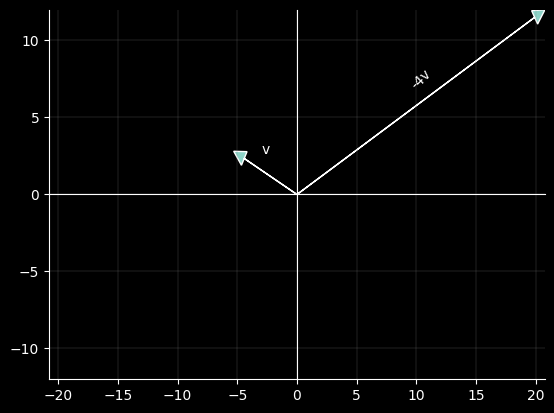

In [ ]:
# we know v has a magnitude of 6 and multiplying it by 4 or -4 doesn't change the direction,
# so magnitude = 24 units

# direction changes with 180 degrees so 210 - 180 = 30

# that really is all there is to it, but let's plot it

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## -4v
magnitude = 24
angle = 30
radian = np.deg2rad(angle) #converting to radian for plotting

x1 = magnitude * np.cos(radian)
y1 = magnitude * np.sin(radian)

start = [0,0] # set vector origin
plt.arrow(*start, x1,y1, length_includes_head=True, head_width=1, head_length=1)
plt.text(x1/2, y1/2+1.5, '-4v', ha='center', va='center', rotation=angle+15)

## decided to plot v as well
mag2 = 6
angle2 = 210
rad2 = np.deg2rad(angle2)

x2 = mag2 * np.cos(angle2)
y2 = mag2 * np.sin(angle2)

plt.arrow(*start, x2,y2, length_includes_head=True, head_width=1, head_length=1)
plt.text(x2/2, y2/2+1.5, 'v', ha='center', va='center')

# plot limits
plt.xlim([-max(abs(x1), 1), max(abs(x1), 1)])
plt.ylim([-max(abs(y1), 1), max(abs(y1), 1)])

# spines and grid
ax = plt.gca()
ax.spines['right'].set_position('zero')
ax.spines['top'].set_position('zero')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.75)

plt.show()

---

**Day 7**


>im kinda drunk but i need a daily math problem so shoot

>chatGPT: Sure, here's a math problem for you:
>
>What is the value of x in the equation: 3x - 7 = 8?
>
>Take your time to think about it, and please be careful if you're feeling unwell due to drinking. Remember to take care of yourself and stay safe.


In [ ]:
(8+7)/3

5.0

>me: five

>chatGPT: Yes, that's correct! The value of x in the equation 3x - 7 = 8 is indeed 5. Well done!

>me: why do you say 'take care of yourself and stay safe'? that's unusual

>chatGPR: When you mentioned that you were feeling drunk, it raised concerns about your safety and well-being. It is important to prioritize your health and safety, especially when you're not feeling your best. That's why I suggested taking care of yourself and staying safe. Do you want me to provide another math problem?

> Sure, give me another problem. But why do you suggest 'taking care of yourself and staying safe.'?

>chatGPT: My suggestion to take care of yourself and stay safe is meant to encourage you to take a break if you need it, drink water to stay hydrated, and avoid any risky behavior that could lead to harm.
>
>With that said, here is another math problem for you:
>
>If a circle has a radius of 6 cm, what is its circumference? (Use π = 3.14)
>
>Take your time to solve the problem and let me know if you need any help.

In [ ]:
2*3.14*6

37.68

>Me: 37.68, why do you encourage me to take a break and drink water when I'm asking for math problem?

>chatGPT: Great job! Yes, the circumference of a circle with a radius of 6 cm is indeed 37.68 cm (rounded to two decimal places).
>
>As an AI language model, my primary goal is to provide helpful and informative responses to your questions, while also being aware of your well-being. I encourage you to take care of yourself and stay safe because I recognize that you may be in a vulnerable state due to being intoxicated.
>
>Drinking water and taking breaks can help you stay hydrated, avoid dehydration, and reduce the effects of alcohol consumption. It's important to prioritize your health and well-being, even when engaging in leisure activities like solving math problems.

>Me:good nigh

>chatGPT: Good night! Don't hesitate to reach out if you need any help in the future.
---

**Day 6**

Today i will write a prime estimator because I've never really done a good one

```all(iterable)``` returns True if all items in an iterable are true, otherwise it returns False. 

In is_prime() function, ```all(n % i != 0 for i in range(2, int(n ** 0.5) + 1))``` checks if n is divisible by any integer between 2 and the square root of n. If none of these integers divide n, then all() returns True.

generator expression for is_prime()

```next(iterator, default)``` returns the next item from an iterator.

In the first_1000_primes list comprehension, ```first_1000_primes = [next(primes) for _ in range(1000)]``` next() retrieves the next prime number from the primes generator expression. Throwaway variable _ is used to ignore index of the loop, and run it 1000 times, calling next(primes) each time to generate the next prime number in the sequence.

#### Interesting wikiarticle on the subject: <a href="https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes">Sieve of Eratosthenes</a>

In [ ]:
def is_prime(n):
    return n > 1 and all(n % i != 0 for i in range(2, int(n ** 0.5) + 1)) 

primes = (n for n in range(2, 10000) if is_prime(n))
first_1000_primes = [next(primes) for _ in range(1000)]

print(first_1000_primes)
len(first_1000_primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 12

1000

In [ ]:
%%timeit
def is_prime(n):
    return n > 1 and all(n % i != 0 for i in range(2, int(n ** 0.5) + 1))

primes = (n for n in range(2, 10000) if is_prime(n))
first_1000_primes = [next(primes) for _ in range(1000)]

14.4 ms ± 76.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Nice.

---

**Day 5**

<div style="display: flex; flex-direction: row;">
  <div style="flex: 3;">
    
> Me: Hello friend, I want you to create another challenge/problem for me. Do you remember the difficulty scale we made?

> chatGPT: Yes, I remember. We had four difficulty levels: easy, medium, hard, and expert. Which level would you like your challenge to be in?

>Me: What - no, that was not the - whatever, uh, medium.

<blockquote>chatGPT: I see. Here's a mathematical challenge for you:

Challenge: Number Digit Sum

Write a Python function that takes a positive integer n and returns the sum of the digits of n. Your function should work for any value of n that is less than or equal to $10^{1000}$.

For example, if n is 12345, the function should return 15 (which is the sum of 1, 2, 3, 4, and 5).

Note: You may not convert the integer to a string or use any built-in Python functions that can directly handle large integers. You must implement the algorithm to sum the digits of n yourself.</blockquote>


  </div>

  <div style="flex:0.1;">
  </div>

  <div style="flex: 1;">
     <h2>
     Modulo % and <br>
     integer division //
    </h2>
    <a href='https://en.wikipedia.org/wiki/Modulo'>Modulo on wikipedia</a><br>
    <a href='https://en.wikipedia.org/wiki/Division_(mathematics)#Of_integers'>Int division on wikipedia</a>
    
  </div>
</div>

In [ ]:
# if we could use split by string and sum():
def my_function(n):
    digits = [int(i) for i in str(n)]
    return sum(digits)

print(my_function(12345))
# this should work with all positive int values for n

# we're going to have to try something else

# this extracts digits of n, one at the time from the smallest (last) to biggest (first) using % (modulo)
# adds them to 'summation' variable and remove them from n using // (integer division)

def no_string(n):
    summation = 0
    while n > 0:
        summation += n % 10 # dividing a positive int by 10, the remainder is always the last digit of n in base 10
        n //=10  # dividing a positive int by 10 shifts the digits of the number one place to the right
    return summation

no_string(12345)

15


15

---

**Day 4**

<div style="display: flex; flex-direction: row;">
  <div style="flex: 2;">
    
>Me: Give me a simple linear combination problem to solve. Make it concrete with Pokémon stats or something.

<blockquote>chatGPT: Sure, here's a linear combination problem using Pokémon stats:

Suppose you have two Pokémon, Pikachu and Charmander. Pikachu has an Attack stat of 55 and a Defense stat of 40, while Charmander has an Attack stat of 52 and a Defense stat of 43. You want to create a linear combination of these stats to determine a "power level" for each Pokémon.

Let's say you decide to use the formula:

Power Level = 2 x Attack + Defense

What is the power level for Pikachu and Charmander according to this formula?</blockquote>
  </div>
  <div style="flex: 1;">
     <img src='https://png.pngitem.com/pimgs/s/478-4780727_oak-transparent-professor-oak-png-png-download.png'>
  </div>
</div>

In [ ]:
pika = {'atk':55, 'def':40}
char = {'atk':52, 'def':43}

def power_level(pokemon):
    return 2 * pokemon['atk'] + pokemon['def']

power_level(pika), power_level(char)


(150, 147)

>Me: On a scale of 0 and 10 in difficulty, where 0 is 16th century illiterate peasant and 10 is the smartest imaginable AGI, trained on all accumulated data throughout the history of all civilisation, what would you rate this problem?

>chatGPT: On the scale you provided, where 0 represents an illiterate peasant and 10 represents a superintelligent AGI, I would rate this problem as a 2 or 3 in difficulty.

>Me: Create another linear combination problem, with the difficulty of 5. Use whatever examples you can come up with, be creative. It doesn't have to be video games.

<blockquote>chatGPT: Sure, here's a problem with a difficulty level of 5, using a different example:

Suppose you are a manager of a coffee shop that sells three types of drinks: coffee, tea, and hot chocolate. You keep track of the sales volume for each type of drink over a period of time and record the data in a matrix:

|       |Coffee |Tea	|Hot Chocolate|
| ---   | ---   | ---   |  --- |
|Day 1	|100	|50	    |20
|Day 2	|80	    |60	    |30
|Day 3	|120	|40	    |25

You want to determine the linear combination of the sales volume of these three drinks that represents the total sales volume for each day. In other words, you want to find a formula of the form:

Total Sales Volume (Day i) = a * Coffee Sales Volume (Day i) + b * Tea Sales Volume (Day i) + c * Hot Chocolate Sales Volume (Day i)

where a, b, and c are constants that you need to determine.

To make sure that your formula is accurate, you decide to check it against the actual total sales volume for each day. You find that the total sales volume for each day is as follows:

|Total| Sales Volume|
| --- | --- |
|Day 1|	170
|Day 2|	170
|Day 3|	185

What are the values of a, b, and c that give the correct formula for the total sales volume?
</blockquote>

In [ ]:
# sry chatgpt but either I'm stupid or u are, it's just summation
import numpy as np

coeff = np.array([[100, 50,   20],
                  [ 80, 60,   30],
                  [120, 40,   25]])
                  
const = np.array( [170, 170, 185])

print(np.column_stack((coeff,const)))

np.linalg.solve(coeff,const)

[[100  50  20 170]
 [ 80  60  30 170]
 [120  40  25 185]]


array([1., 1., 1.])

>Me: I want a new problem with difficulty of 5. No example, just plain math.

<blockquote>chatGPT:
Sure, here's a linear combination problem with a difficulty of 5:

Given the following system of equations:

$2x + 3y + 4z = 11$

$3x - 2y + z = -1$

$x + 5y - 3z = 7$

Find the values of x, y, and z that satisfy all three equations.</blockquote>

In [ ]:
# i tried doing this for hand with rref, turns out chatGPT can create weird fractions

coeff = np.array([[2, 3, 4], [3, -2, 1],[1, 5, -3]])

const = np.array([11,-1,7])

x,y,z = np.linalg.solve(coeff,const)

# rounded
print(f'x = {x:.4}, y = {y:.4}, z = {z:.4}')

x = 0.59, y = 1.9, z = 1.03


Yeah, I guess I will have to be more specific when asking chatGPT to construct questions, or formulate the questions myself.

Or maybe adjust the difficulty scale I provided.

---

**Day 3**

<div style="display: flex; flex-direction: row;">
  <div style="flex: 2;">
    
>Me: can u create another hearthstone challenge, any math is ok

<blockquote>chatGPT: Sure, here's a more specific Hearthstone challenge for you: <br><br>
Suppose you have a deck of 30 cards, containing 10 spells, 18 minions, and 2 weapons. The spell cards have a mana cost between 1 and 4 mana, the minions have a mana cost between 1 and 8 mana, and the weapons have a mana cost of 2 and 4 mana.

Challenge:

What is the probability of having a hand of 5 cards with a total mana cost of 10 or less, assuming that you draw 5 cards from your deck at the start of the game?

Hint: You may want to consider the number of cards with each mana cost, the number of different ways you can choose 5 cards with a total mana cost of 10 or less, and the different combinations of spells, minions, and weapons that can add up to 10 or less mana cost.</blockquote>
  </div>
  <div style="flex: 1;">
     <img src='https://liquipedia.net/commons/images/6/6b/Garrosh_Hellscream.png'>
  </div>
</div>

In [ ]:
import numpy as np
np.random.seed(42) # to keep consistency when testing functions

# I decide  to pre-determine the mana cost for all cards
# we /could/ use some kind of wave function collapse for
# card mana values but that might be a bit of an overkill
# another aproach would be to not pre-determ values and sum ALL probabilities

# Anyway: randomize 30 cards within specified mana range for each type of card
random_cards = np.array([[np.random.randint(low=1, high=5, size=10)],   # Spells
                         [np.random.randint(low=1, high=9, size=18)],   # Minions
                         [np.random.randint(low=2, high=5, size =2)]],  # Weapons
                         dtype=object)

# list comprehenstion
deck = [random_cards[i][0].tolist() for i in range(len(random_cards))]

# check if everything is correct
print(f'With a deck of {len(deck[0])} spells, {len(deck[1])} minions and {len(deck[2])} weapons:')
print(f'Each spell card mana: {deck[0]}')
print(f'Each minion card mana: {deck[1]}')
print(f'Each weapon card mana: {deck[2]}')

# But since it doesn't matter what type of card we draw
only_mana = [foo for bar in deck for foo in bar] # readability /s

print(f'Deck still has 30 cards: {len(only_mana) == 30}')

With a deck of 10 spells, 18 minions and 2 weapons:
Each spell card mana: [3, 4, 1, 3, 3, 4, 1, 1, 3, 2]
Each minion card mana: [3, 7, 3, 3, 8, 5, 4, 8, 8, 3, 6, 5, 2, 8, 4, 6, 6, 2]
Each weapon card mana: [2, 2]
Deck still has 30 cards: True


In [ ]:
# first let's just do a rough estimate
only_mana.sort() # sort list
print(f'{only_mana} sum = {sum(only_mana)} \n ')

mean = sum(only_mana)/len(only_mana)

print(f'{mean*5=}')

[1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6, 6, 6, 7, 8, 8, 8, 8] sum = 120 
 
mean*5=20.0


In [ ]:
# the average hand, using very simple est methods, would have a theoretical cost of 20 mana
# with this estimation, we can assume probability of a hand to have < 10 mana will be very low

# actually let's do some more statistics with pandas
import pandas as pd
df = pd.DataFrame({'Mana cost': only_mana})

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mana cost,30.0,4.0,2.212815,1.0,2.25,3.0,5.75,8.0


Let's get some notation in here because I need to become better at that.

**Binomial coefficient formula**
<h2> 

$n \choose k$ = $\frac{n!}{k!(n-k)!}$

</h2>

$n$ is used to calculate the number of **combinations** of size $k$ that can be selected from a set of $n$ items.

**Permutation formula**

<h2>

$_n P _r$ = $\frac{n!}{n-r!}$

</h2>

$n$ = total number of objects / set / population <br>
$r$ = number of objects selected / subset of n or sample set

Here $n$ is used to calculate the number of **arrangements** of $r$ items that can be selected from a set of $n$ items.


In [ ]:
# the deck can be shuffled in 30! (factorial) combinations but we're interested in a hand of five cards

# Binomial coefficient formula: n choose k = n! / (k! * (n-k)!)
# we could import factorial function from math library or use scipy library but this should work as well

def fact(n):
    if n == 0: return 1
    else: return n * fact(n - 1)

def binom_coeff(n,k):
    return fact(n)/(fact(k) * fact(n-k))

n = 30 # cards in deck
k = 5  # cards in hand

print(f"There are {int(binom_coeff(n,k))} possivle combinations of {k} drawn cards in a deck of {n} cards. \n")

def permutation(n,r):
    return fact(n)/fact(n-r)

print(f"There are {int(permutation(n,k))} possible arrangements of {k} drawn cards in a deck of {n} cards. \n")

print('Given a partially randomized mana cost for each card, how many of these combinations add up to 10 or less mana?')



There are 142506 possivle combinations of 5 drawn cards in a deck of 30 cards. 

There are 17100720 possible arrangements of 5 drawn cards in a deck of 30 cards. 

Given a partially randomized mana cost for each card, how many of these combinations add up to 10 or less mana?


In [ ]:
np.bincount(only_mana) # damn i need to learn more numpy

array([0, 3, 5, 8, 4, 2, 3, 1, 4])

**Cartesian product maybe can help**

In [ ]:
# The brute force loop method - because Python is more fun than theoretical statistics (sry bout it x)
hand = only_mana

# might wanna use enumerate here...
count = 0

# Loop while the sum of mana cost from drawn cards >10
while sum(hand) > 10:
    # Update the list by randomly selecting a value to decrease by 1
    hand = np.random.choice(only_mana, size=5)
    print(f"Iteration {count+1}: {hand}")
    count += 1

print(f"Final hand: {hand}")
print(f"Number of iterations: {count +1}")


Iteration 1: [3 7 5 8 3]
Iteration 2: [6 4 8 8 3]
Iteration 3: [8 8 3 3 8]
Iteration 4: [8 3 8 4 3]
Iteration 5: [6 4 6 1 2]
Iteration 6: [4 2 5 3 2]
Iteration 7: [4 2 6 8 3]
Iteration 8: [4 7 3 7 5]
Iteration 9: [1 4 8 3 8]
Iteration 10: [2 3 8 2 3]
Iteration 11: [1 3 4 2 4]
Iteration 12: [2 2 1 8 2]
Iteration 13: [5 3 2 5 8]
Iteration 14: [4 7 3 1 3]
Iteration 15: [8 2 3 3 3]
Iteration 16: [2 3 6 8 6]
Iteration 17: [8 2 5 3 3]
Iteration 18: [4 3 5 6 7]
Iteration 19: [6 8 8 8 3]
Iteration 20: [3 8 3 3 1]
Iteration 21: [6 2 3 6 1]
Iteration 22: [3 2 6 3 4]
Iteration 23: [4 2 1 1 1]
Final hand: [4 2 1 1 1]
Number of iterations: 24


In [ ]:
# ok now we just run this loop like a thousand times and check the values (this is so stupid...)
# let's quickly rewrite the the loop and make it callable

def nested_af():
    hand = only_mana
    # Initialize iteration count to 0
    count = 0

    # Loop while the sum of mana cost from drawn cards >10
    while sum(hand) > 10:
        # Update the list by randomly selecting a value to decrease by 1
        hand = np.random.choice(only_mana, size=5)
        count += 1

    # returns array with the iteration count and the final, <10 mana cost hand
    return count +1, hand


a, b = nested_af()
a, b # ok it works, let's run it

(7, array([1, 1, 2, 3, 3]))

In [ ]:
all_iterations = []

for i in range(1000):
    a, b = nested_af()
    all_iterations.append(1/a)

# but since we wanna sum up the percentages
probs_dec = [i/100 for i in all_iterations]
prob_sum = sum(probs_dec)

prob_sum

0.50086100469601

In [ ]:
# Ok, I got it to converge to like ~0.5% Perhaps should check it with a more valid method??

ANYWAY. My final answer is. 0.5%. I should probablt go study some statistics.

---

**Day 2**

>Me: Give me a challenge in probability by using Hearthstone as an example scenario. Perhaps some card drawing mechanics or lethal probability by drawing a certain card etc.

>chatGPT: Sure, here's a challenge for you!
 Let's say you're playing Hearthstone and you have a certain deck of 30 cards. In this deck, there are 4 legendary cards, 10 rare cards, 12 common cards and 4 basic cards.
 Challenge:
 What is the probability of drawing a legendary card in the first 3 draws of your deck, assuming the cards are not replaced once they have been drawn?

In [ ]:
# There are multiple ways (obviously) to aproach this challenge.

draw1, draw2, draw3 = 4/30, 4/29, 4/28
print(f'Probability of drawing a legendary card on the first three draws: {(draw1+draw2+draw3 * 100):.3f}%')

Probability of drawing a legendary card on the first three draws: 14.557%


---

**Day 1**



<div style="display: flex; flex-direction: row;">
  <div style="flex: 1;">
    <img src='https://wojakparadise.net/wojak/9450/img'>
  </div>
  
  <div style="flex: 2;">
    Me: Give me a very easy linear system of equations to solve.

    ChatGPT: Sure, here's a simple one:

    x + y + z = 6
    2x + 2y + 2z = 12
    3x + 3y + 3z = 18
  </div>
</div>

Interesting, this look like some kind of arithmic sequence.
Just by looking at it I can tell there's an easy solution:
letting all coefficients (x,y,x) equal to 2.

Let's try it.

In [ ]:
import numpy as np
coeff = np.array([[1, 1, 1],
                  [2, 2, 2],
                  [3, 3, 3]])
const = np.array( [6, 12, 18])

# Since we assume all coefficients have the same value, we can create a rather unconventional loop
for i in range(3):
    if coeff[i].sum() * 2 != const[i]:
        print(f"Equation {i+1} is not satisfied.")
    else:
        print(f"Equation {i+1} is satisfied.")
x,y,z = 2,2,2

# "Proof"
print(sum(coeff[0])*x == const[0], sum(coeff[1])*y == const[1], sum(coeff[2])*z == const[2])


Equation 1 is satisfied.
Equation 2 is satisfied.
Equation 3 is satisfied.
True True True


In [ ]:
# Well, I'm glad that worked out, but what if I intuitively didn't 'see' the 2? How could I have satisfied the equations?
# Also, are there other possible solutions? I guess we could try to create some rrf.

print((coeff[0] * - 2) + coeff[1])
print((const[0] * - 2) + const[1])
print("hm, ok, this doesn't work, what about")
print((coeff[0] * - 1) + coeff[1])
print((const[0] * - 1) + const[1])
print("ok, now we just got the first equation")

# yeah imma get back to this, maybe

[0 0 0]
0
hm, ok, this doesn't work, what about
[1 1 1]
6
ok, now we just got the first equation


---

**Day 0**

>Me: give me a super simple math problem to solve, we're talking like grade school arithmetic but formulate it like an illiterate peasant from the 15th century

>chatGPT: Ahoy! Me needeth thee to answereth this poser: if me have 3 apples and me give 2 to me mate, how many apples be left for me to enjoy with me ale?

<img src=https://cdn.historycollection.com/wp-content/uploads/2018/09/Peasants-pic-11-Wikimedia-Commons.jpg>

In [ ]:
print(3-2)

"""proof"""
1 == 3-2

1


True

>Me: Ahoy! I reckon you will have one apple and your mate will have two! How generous!

>chatGPT: Ye be a clever one, matey! 'Tis correct! Ye have solved the poser with ease. Enjoy ye one apple and me hope ye find it to be a delicious treat!

OK that was stupid, but it's a proof of concept. I will be asking chatGPT (OR someone else/myself) for a math problem to solve with Python each day until whenever I'm fed up with this idea.

*Disclaimer: As I've previously used chatGPT and received some rather... creative calculations, I think it's a good idea to double check that the answers is indeed correct through other means.*

---